In [1]:
#First collect the data...that is data aqcuisition.
#Then do Exploratory data analysis then we gonna apply linear regression on one state and then we will try to predcit no. of 
#cases on next day or day after that.

In [2]:
#Import the Libraries we needed.

In [3]:
import numpy as np                   # numpy is used to perform the numerical operation.
import pandas as pd                  #pandas is used for data manipulation or data wrangleing..
from matplotlib import pyplot as plt #matplotlib and seaborn are the libraries which are used for visualization.
import seaborn as sns
import datetime as dt                #in our dataset we have a variable of datetime that's why we gonna use datetime library.

In [4]:
covid=pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)   
#We are using parse_dates=['Date']: this we are using because we want to tell pandas that Date column is exactly date(datatype)
#and nothing other than that..
# If we don't write parse_date=['Date'] then pandas understand it as string or some categorical column and work on it as 
#strig and we are not able to find differences in date or no. of date... if needed anywhere.

In [5]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:
covid.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [7]:
covid.shape   #We have 18110 entries (rows) and 9 columns.

(18110, 9)

In [8]:
#NOW,AS WE DON'T REQUIRE ALL THE COLUMNS LIKE TIME CONFIRMEDINDIANNATIONAL AND CONFIREMEDFOREIGNNATIONAL ARE COLUMN OF NO USE 
#FOR US....SO WE ARE NOT DROPIING BUT INSTEAD OF THAT ASSIGN ONLY THOSE COLUMN WE NEED FOR ANALYSIS AGAIN TO VARIBALE NAME
#COVID....AND RENAME IT.

In [9]:
covid=covid[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
covid

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


In [10]:
#Just Rename the column if neccessary
covid.columns=['date','state','cured','deaths','confirmed']

In [11]:
covid.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [12]:
covid.tail()

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [13]:
today=(covid.date=='2021-08-11')      #this gives the answer in true false where date is 2021-04-22 then true otherwise 
                                      #fasle....but we dont want output like this ..so we make it a dataframe by applying 
                                      #covid[] outside the covid.date=='2021-04-22' then we get result as follows..only data 
                                      #of that particular date. 
today

0        False
1        False
2        False
3        False
4        False
         ...  
18105     True
18106     True
18107     True
18108     True
18109     True
Name: date, Length: 18110, dtype: bool

In [14]:
today=covid[covid.date=='2021-08-11']
today

,date,state,cured,deaths,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279
18079,2021-08-11,Chandigarh,61150,811,61992
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18081,2021-08-11,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654
18082,2021-08-11,Delhi,1411280,25068,1436852
18083,2021-08-11,Goa,167978,3164,172085


In [15]:
today.shape

(36, 5)

In [16]:
#NOW WE WANT TO KNOW THE NAME OF TOP 5 STATES HAVING MOST RAPID CASE AS OF 2021-08-11
today.head()

,date,state,cured,deaths,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279


In [17]:
#Sorting data w.r.t confirmed cases
#so we are sorting the dataframe sort using the column confirmed....top 5 means ascending =False..
max_confirmed_cases=today.sort_values(by='confirmed',ascending=False)
max_confirmed_cases.head()

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


In [18]:
#Top 5 states  of India having most of the covid cases.
max_confirmed_cases[0:5]

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


In [19]:
#Top 10 STATES  of India having most of the covid cases.
max_confirmed_cases[0:10]

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18082,2021-08-11,Delhi,1411280,25068,1436852
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18099,2021-08-11,Odisha,972710,6565,988997


In [20]:
top_states_confirmed=max_confirmed_cases[0:5]

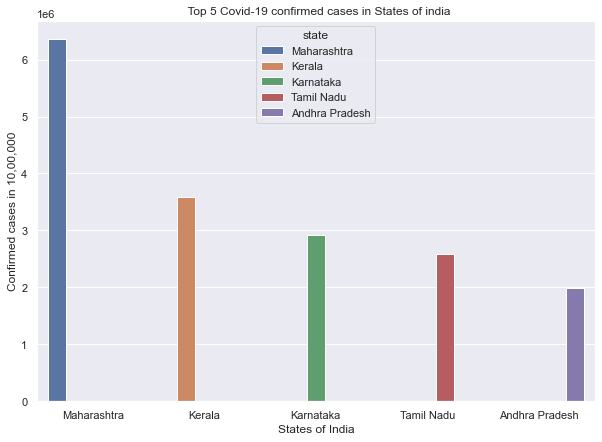

In [21]:
#Top 5 states of India having most of the covid cases.
sns.set(rc={'figure.figsize':(10,7)}) # dimension od graph/plot is 10X7.
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue='state')   #hue gives different colour to diff state top 5.
plt.xlabel("States of India")
plt.ylabel("Confirmed cases in 10,00,000")
plt.title("  Top 5 Covid-19 confirmed cases in States of india")
plt.show()


In [22]:
#Now we want to make barplot for top 5 state having max covid cases..so so create a variable and store top 5 states name in it.
top10_states_confirmed=max_confirmed_cases[0:10]

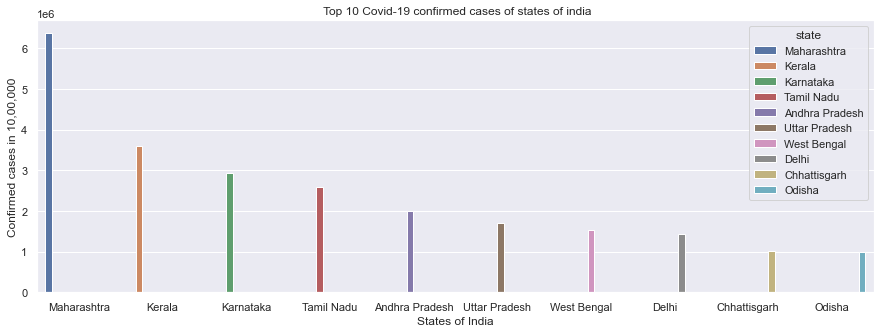

In [23]:
#NOW LETS PLOT TOP 10 CITIES OF INDIA IN BARPLOT USING SEABORN .
sns.set(rc={'figure.figsize':(15,5)}) # dimension od graph/plot is 15X10.
sns.barplot(x="state",y="confirmed",data=top10_states_confirmed,hue='state')#hue gives different colour to diff city top 5.
plt.xlabel("States of India")
plt.ylabel("Confirmed cases in 10,00,000")
plt.title(" Top 10 Covid-19 confirmed cases of states of india")
plt.show()


In [24]:
#NOW WE DO SIMILAR ANALYSIS ON NUMBER OF DEATHS.
#sorting the states on the basis of deaths.
max_death_cases=today.sort_values(by='deaths',ascending=False)
max_death_cases.head()

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


In [25]:
#NOTE:KERALA IS NOT THERE IN TOP MOST STATES HAVING MOST OF DEATHS.

In [26]:
#TOP 5 STATES OF INDIA HAVING MAXIMUM DEATHS DUE TO COVID-19.
top5_states_death=max_death_cases[0:5]

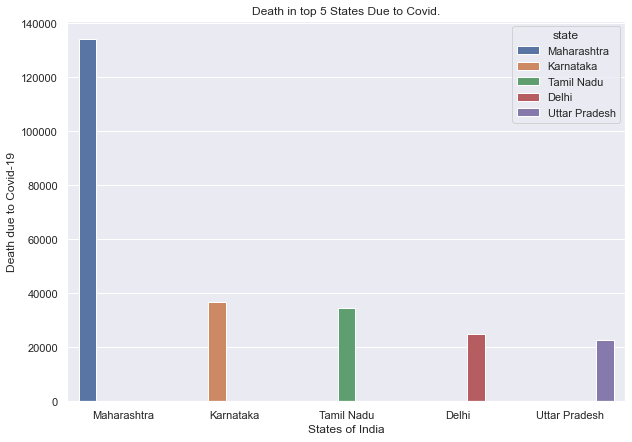

In [27]:
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(x='state',y='deaths',data=top5_states_death,hue='state')
plt.xlabel("States of India")
plt.ylabel("Death due to Covid-19")
plt.title("Death in top 5 States Due to Covid.")
plt.show()

In [28]:
#TOP 10 STATES OF INDIA HAVING MAXIMUM DEATHS DUE TO COVID-19.
top5_states_death=max_death_cases[0:10]

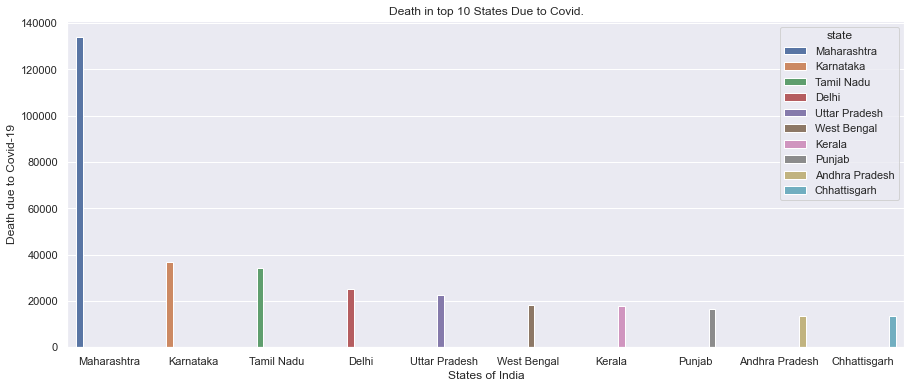

In [29]:
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='state',y='deaths',data=top5_states_death,hue='state')
plt.xlabel("States of India")
plt.ylabel("Death due to Covid-19")
plt.title("Death in top 10 States Due to Covid.")
plt.show()

In [30]:
#NOW LETS CHECK OUT THE NUMBER OF PEOPLE GOT CURED FROM COVID-19.

In [31]:
#TOP 5 CURED CASES STATEWISE IN INDIA.
#sorting the states on the basis of deaths.
max_cured_cases=today.sort_values(by='cured',ascending=False)
max_cured_cases.head()

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


In [32]:
top5_states_cured=max_cured_cases[0:5]   #Top 5 Cured cases states

In [33]:
top10_states_cured=max_cured_cases[0:10]   #Top 10 Cured cases states.

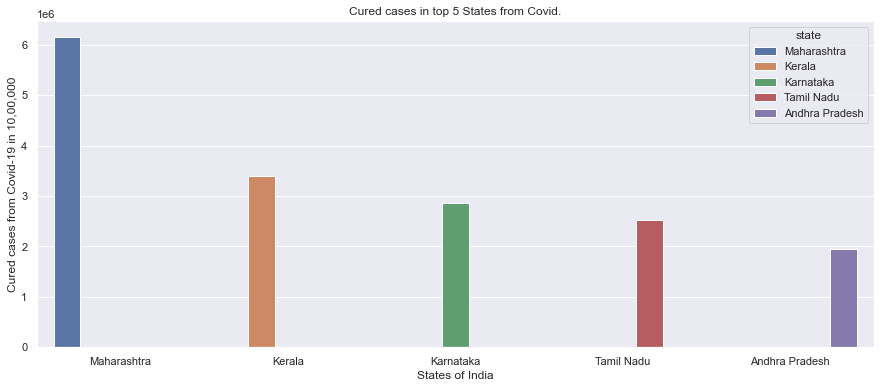

In [34]:
#Top 5 cured cases states.
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='state',y='cured',data=top5_states_cured,hue='state')
plt.xlabel("States of India")
plt.ylabel("Cured cases from Covid-19 in 10,00,000")
plt.title("Cured cases in top 5 States from Covid.")
plt.show()

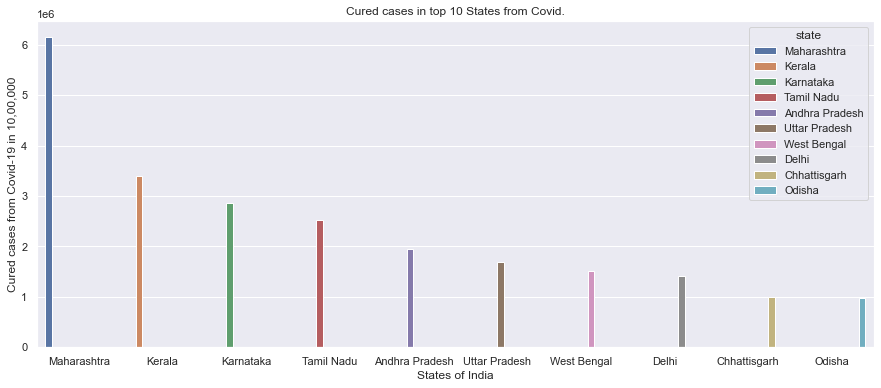

In [35]:
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='state',y='cured',data=top10_states_cured,hue='state')
plt.xlabel("States of India")
plt.ylabel("Cured cases from Covid-19 in 10,00,000")         #10,00,000....6.3x10,00,000=6300000 means 63 lakhs. around...
plt.title("Cured cases in top 10 States from Covid.")
plt.show()

In [36]:
#NOW WE WANT TO DO ANALYSIS STATEWISE.....

In [37]:
covid.head()        #This shows First case came in Kerala on 2020-01-30

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [38]:
covid.tail()

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


# MAHARASHTRA

In [39]:
#MAHARASHTRA
maha=covid[covid.state=='Maharashtra']
maha.shape

(520, 5)

In [40]:
maha.head()       #First case in Maharashtra came on 2020-03-09

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14


In [41]:
maha.tail()   

,date,state,cured,deaths,confirmed
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833
18094,2021-08-11,Maharashtra,6159676,134201,6363442


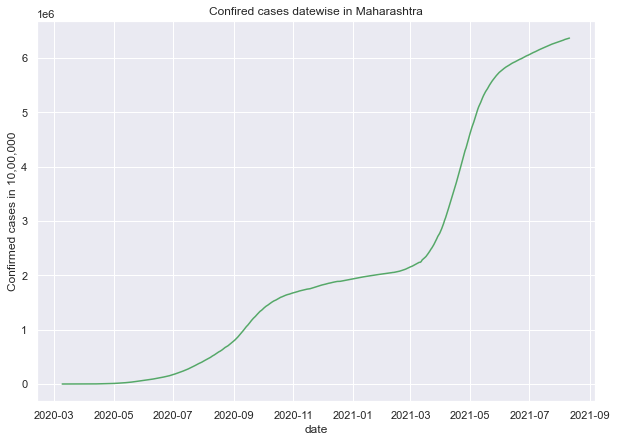

In [42]:
#How does the curve of confirmed cases looks like datewises.....getting the curve we gonna use line plot...we want to check
#out the rapid growth.
sns.set(rc={'figure.figsize':(10,7)})
sns.lineplot(x='date',y='confirmed',data=maha,color='g')
plt.ylabel('Confirmed cases in 10,00,000')
plt.title("Confired cases datewise in Maharashtra")
plt.show()


In [43]:
#EXPLANATION OF THE CURVE
#from 2020-03 to 2020-05 there were cases but there wasnot any hipe in it....
#from 2020-07 to 2020-11 there was an exponential growth in cases...that was due to 1st strain of covoid-19.
#from 2020-11 to 2021-03 the cases become bit stable ,because people and govt were taking neccessary measures to protect public.
#till that covid-19 strain 1 was there...............................
#------------------------------------------------------------------------------------------------------------------------------
#But from 2021-03 we can see the exponential growth in the cases ....and that was due to the 2nd strain came to hit..
#this shows second covid strain was very dangerous and easily speard and infects people.
#till 2021-07 there was rapid growth..
#then again some strict measures where taken that controls the spread a bit...till 2021-09...till we have the data.

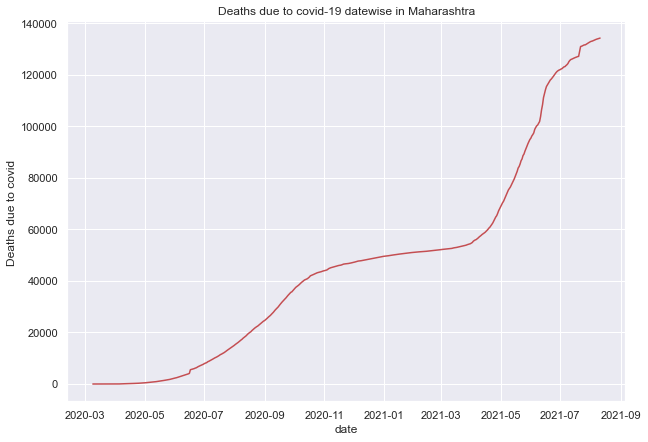

In [44]:
#How does the curve of deaths due to covid looks like datewises IN MAHARASHTRA.....
#getting the curve we gonna use line plot...we want to check out the rapid growth.
sns.set(rc={'figure.figsize':(10,7)})
sns.lineplot(x='date',y='deaths',data=maha,color='r')
plt.ylabel('Deaths due to covid ')
plt.title("Deaths due to covid-19 datewise in Maharashtra")
plt.show()

In [45]:
#EXPLANATION OF THE ABOVE DEATH GRAPH IN MAHARASHTRA.
#FROM 2020-02 to 2020-06 there were deaths but not that much.
#From 2020-06 to 2020-10 there was an exponential growth in the deaths.
#From 2020-10 to 2021-03 death are high in number but in bit controlled.
#From 2021-03 to mid 2021-08  there was an exponential growth in deaths in Maharashtra.

# KERALA

In [46]:
kerala=covid[covid.state=='Kerala']

In [47]:
kerala.head()    #this shows the first case came in kerala was on 2020-01-20

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [48]:
kerala.tail()

,date,state,cured,deaths,confirmed
17946,2021-08-07,Kerala,3317314,17515,3513551
17982,2021-08-08,Kerala,3337579,17654,3533918
18018,2021-08-09,Kerala,3357687,17747,3552525
18054,2021-08-10,Kerala,3377691,17852,3565574
18090,2021-08-11,Kerala,3396184,18004,3586693


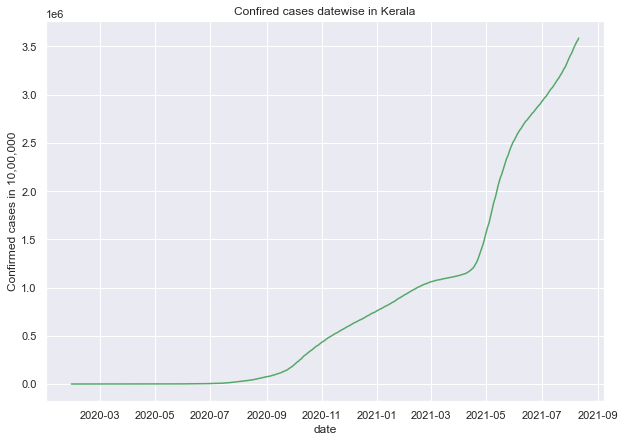

In [49]:
#How does the curve of confirmed cases looks like datewises.....getting the curve we gonna use line plot...we want to check
#out the rapid growth.
sns.set(rc={'figure.figsize':(10,7)})
sns.lineplot(x='date',y='confirmed',data=kerala,color='g')
plt.ylabel('Confirmed cases in 10,00,000')
plt.title("Confired cases datewise in Kerala")
plt.show()

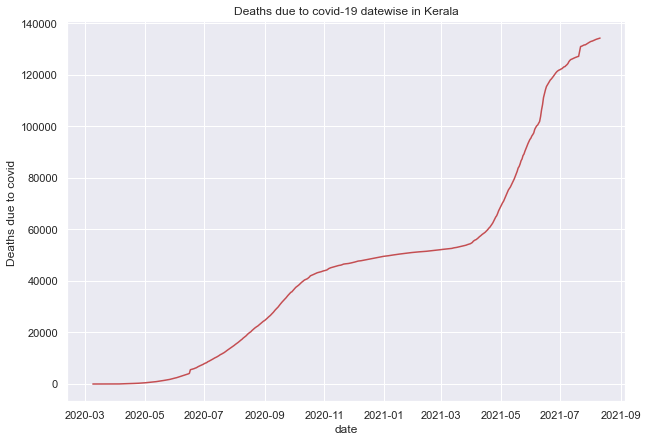

In [50]:
#How does the curve of deaths due to covid looks like datewises IN KERALA.....
#getting the curve we gonna use line plot...we want to check out the rapid growth.
sns.set(rc={'figure.figsize':(10,7)})
sns.lineplot(x='date',y='deaths',data=maha,color='r')
plt.ylabel('Deaths due to covid ')
plt.title("Deaths due to covid-19 datewise in Kerala")
plt.show()

# JAMMU AND KASHMIR

In [51]:
jk=covid[covid.state=='Jammu and Kashmir']

In [52]:
jk.head()    # This shows first case of covid came to Jammu and Kashmir on 2020-03-09.

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1


In [53]:
jk.tail()

,date,state,cured,deaths,confirmed
17943,2021-08-07,Jammu and Kashmir,316496,4386,322286
17979,2021-08-08,Jammu and Kashmir,316632,4386,322428
18015,2021-08-09,Jammu and Kashmir,316761,4389,322550
18051,2021-08-10,Jammu and Kashmir,316957,4390,322658
18087,2021-08-11,Jammu and Kashmir,317081,4392,322771


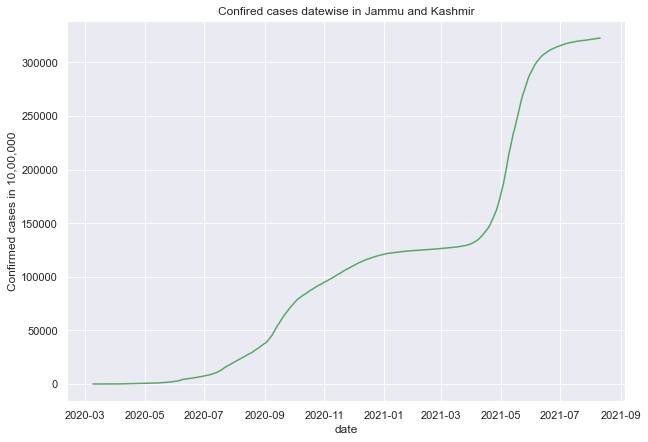

In [54]:
sns.set(rc={'figure.figsize':(10,7)})
sns.lineplot(x='date',y='confirmed',data=jk,color='g')
plt.ylabel('Confirmed cases in 10,00,000')
plt.title("Confired cases datewise in Jammu and Kashmir")
plt.show()

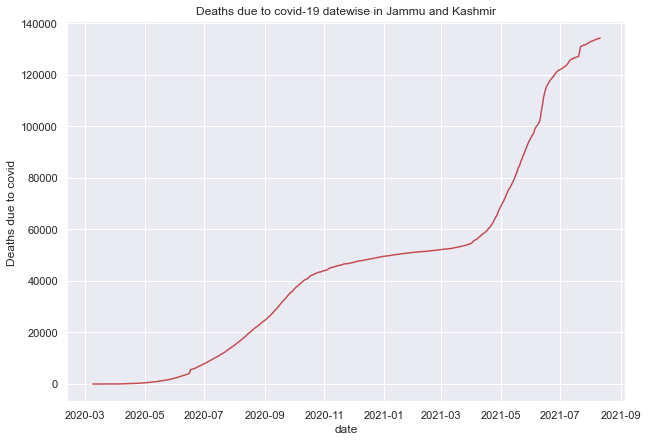

In [55]:
#How does the curve of deaths due to covid looks like datewises IN JAMMU AND KASHMIR.....
#getting the curve we gonna use line plot...we want to check out the rapid growth.
sns.set(rc={'figure.figsize':(10,7)})
sns.lineplot(x='date',y='deaths',data=maha,color='r')
plt.ylabel('Deaths due to covid ')
plt.title("Deaths due to covid-19 datewise in Jammu and Kashmir")
plt.show()

In [56]:
#Tests:Statewise Testing Details dataframe we have now lets work on it.

In [57]:
tests=pd.read_csv('StatewiseTestingDetails.csv')

In [58]:
tests.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [59]:
tests.tail()

,Date,State,TotalSamples,Negative,Positive
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN
16335,2021-08-10,West Bengal,16162814.0,NaN,NaN


In [60]:
#Now till now we have the idea that how much cases are there in each state and how there rapid growth ocuurs.
#on basis of that we are ready to apply ML for predecting the further trend in increase or decrease in covid case.

In [61]:
#And as we have to predict number of cases which is a numerical entity...so for that we gonna use Linear Regression Algorithm.


# PREDICTION FOR MAHARASHTRA

In [62]:
maha['date']=maha['date'].map(dt.datetime.toordinal)

<ipython-input-62-595f711d6bae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date']=maha['date'].map(dt.datetime.toordinal)


In [63]:
#We have convert the date yyyy-mm-dd to some ordinal number...ordinal number are number in series....this will helf 
#in analysising the data while using Linear Regression.....because Linear Regression cannot able to use date ...so any hoe
#have to convert that into ordinals using the imported library datetime .




#And as we have to extract independent variable and dependent varible, and our independent varible cannot be a datetime 
#it must be numerical/ordinal to work with Linear Regression....simple or in Multiple..in Both the cases.

In [64]:
maha.head()

,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [65]:
#Now we are ready to use Linear Regresson Algorithm..over it.

In [66]:
#first divide dataset into train and test and then extract the independent variable and dependent variable.

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
#Extracting Independent and Dependent Varibales.
x=maha['date']        #Independent varible
y=maha['confirmed']   #Dependent Varible

In [69]:
#Train and Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [70]:
#NOW APPLYING THE ALGORITHM...

# 1.RANDOM FOREST REGRESSOR

In [71]:
#1.RANDOM FOREST REGRESSOR.......WE CAN DO CLASSIFICATION AS WELL AS REGRESSION WITH RANDOM FOREST...HERE WE ARE PERFORMING 
#REGRESSION.

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf=RandomForestRegressor()          #Making as Instance of RandomForestRegressor

In [74]:
x_train   #This shows Index of each ORDINAL NUMBER WHICH IS INDEPENDENT VARIABLE FOR US...SO WE REMOVE THE INDEX BY USSING
          #np.array() and reshape it so that we can get the ordinals in a caolumn only.

16582    737971
7490     737717
13882    737896
14494    737913
17914    738008
          ...  
4935     737644
12514    737858
15610    737944
9310     737769
12658    737862
Name: date, Length: 416, dtype: int64

In [75]:
#Like here we go.                        #Independent Variable ie. was date before converted to ordinal number.
np.array(x_train).reshape(-1,1)

array([[737971],
       [737717],
       [737896],
       [737913],
       [738008],
       [737921],
       [737574],
       [737584],
       [737972],
       [737761],
       [737632],
       [737751],
       [737963],
       [737795],
       [737815],
       [737658],
       [737897],
       [737970],
       [738011],
       [737671],
       [737748],
       [737688],
       [737733],
       [737873],
       [737639],
       [737732],
       [737610],
       [737655],
       [737828],
       [737631],
       [737524],
       [737960],
       [737830],
       [737903],
       [737726],
       [737838],
       [737789],
       [737842],
       [737804],
       [737881],
       [737755],
       [737853],
       [737823],
       [737498],
       [737535],
       [737822],
       [737908],
       [737552],
       [737973],
       [737684],
       [737708],
       [737725],
       [737730],
       [737943],
       [737923],
       [737638],
       [738005],
       [737988],
       [737629

In [76]:
np.array(y_train).reshape(-1,1)       #Dependent variable...ie. Confirmed cases

array([[6051633],
       [1595381],
       [3639855],
       [4722401],
       [6336220],
       [5138973],
       [  59546],
       [  85975],
       [6061404],
       [1828826],
       [ 366368],
       [1774455],
       [5979051],
       [1947011],
       [2009106],
       [ 643289],
       [3703584],
       [6043548],
       [6353328],
       [ 825739],
       [1757520],
       [1188015],
       [1692693],
       [2533026],
       [ 431719],
       [1687784],
       [ 192990],
       [ 604358],
       [2041398],
       [ 357117],
       [   1135],
       [5954508],
       [2046287],
       [4094840],
       [1654028],
       [2071306],
       [1925066],
       [2093913],
       [1978044],
       [2812980],
       [1795959],
       [2179185],
       [2028347],
       [     14],
       [   4203],
       [2026399],
       [4410085],
       [  16758],
       [6070599],
       [1097856],
       [1506018],
       [1648665],
       [1678406],
       [5761015],
       [5226710],
       [ 4

In [77]:
#BUILD THE MODEL ON OUR TRAINING SET...CONTAINING TWO VARIVALES x_train and y_train.

In [78]:
rf.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

<ipython-input-78-ccb1599f9545>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))


RandomForestRegressor()

In [79]:
#WE HAVE SUCCESSFULLY BUILT THE MODEL NOW...NOW ITS TIME TO PREDICT THE CONFIRMED CASE FOR GIVEN DATE...OR ORDINAL FOR NOW.

In [80]:
y_pred=rf.predict( [[737745]])    #THIS PREDICITON WAS FOR MAHARASHTRA ONLY.

In [81]:
y_pred

array([1742886.29])

In [82]:
#THIS WAS PREDICTED USING ONLY ONE FACTOR THAT IS DATE...USING SIMPLE REGESSOR...THATS WHY WE ARE NOT GETTING VERY PRECISE ANSWER.

In [83]:
y_pred_rf=rf.predict(np.array(x_test).reshape(-1,1))

In [84]:
y_pred_rf

array([1.75436855e+06, 1.86978837e+06, 5.63702493e+06, 2.18286372e+06,
       5.24883170e+05, 8.48796000e+03, 6.23634580e+06, 1.95674564e+06,
       3.35051094e+06, 2.06549310e+06, 1.98100000e+01, 6.56856000e+03,
       1.90386614e+06, 1.46825832e+06, 7.62749400e+04, 2.68340320e+05,
       5.71105320e+05, 5.31762901e+06, 1.81150375e+06, 5.45965000e+03,
       5.24369400e+04, 3.28778000e+03, 2.64795666e+06, 4.46419000e+03,
       4.05379950e+05, 2.46754787e+06, 5.78054000e+04, 1.06943598e+06,
       1.65481009e+06, 2.15374990e+05, 5.25035596e+06, 6.17612027e+06,
       1.61501917e+06, 6.87333900e+04, 2.30877730e+06, 2.92714595e+06,
       2.40840678e+06, 9.68100000e+01, 5.96748104e+06, 1.54923127e+06,
       5.07354991e+06, 1.71499200e+05, 2.73664891e+06, 1.05597800e+04,
       1.71602158e+06, 2.12100913e+06, 5.14522190e+06, 7.87156840e+05,
       1.27112800e+04, 4.73139895e+06, 1.19630339e+06, 1.82188862e+06,
       3.16773200e+04, 2.14040080e+06, 9.01222600e+04, 1.83086335e+06,
      

In [85]:
from sklearn.metrics import r2_score      # R squared value of 0.91 and above here 0.9999 proves the model is good model.
print("The Accuracy using Random Forest Regressor is:")
r2_score(y_test,y_pred_rf)

The Accuracy using Random Forest Regressor is:


0.9999652061624357

<function matplotlib.pyplot.show(close=None, block=None)>

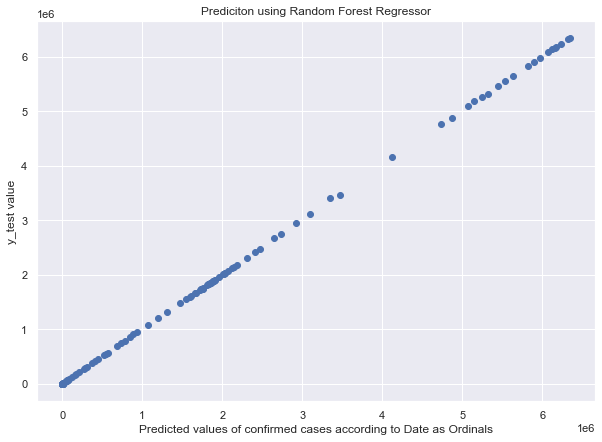

In [86]:
plt.scatter(y_pred_rf,y_test)
plt.xlabel('Predicted values of confirmed cases according to Date as Ordinals')
plt.ylabel('y_test value')
plt.title("Prediciton using Random Forest Regressor")
plt.show

# 2. LINEAR REGRESSION

In [87]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [88]:
#We HAVE BUILT THE MODELON TRAIN DATASET.

In [89]:
y_pred_lr=lr.predict(np.array(x_test).reshape(-1,1))

In [90]:
y_pred_lr

array([[ 2.07453705e+06],
       [ 2.39862784e+06],
       [ 4.55059067e+06],
       [ 3.47460925e+06],
       [ 8.17064796e+05],
       [-5.57080144e+05],
       [ 5.27655403e+06],
       [ 2.74864589e+06],
       [ 3.96722725e+06],
       [ 3.25422752e+06],
       [-1.12747993e+06],
       [-6.08934670e+05],
       [ 2.55419142e+06],
       [ 1.55599179e+06],
       [-6.44621466e+04],
       [ 4.67046745e+05],
       [ 8.55955690e+05],
       [ 4.39502709e+06],
       [ 2.23010063e+06],
       [-6.21898301e+05],
       [-1.81134830e+05],
       [-6.86716459e+05],
       [ 3.77277278e+06],
       [-6.47825564e+05],
       [ 6.61501218e+05],
       [ 3.69499099e+06],
       [-1.68171199e+05],
       [ 1.25782827e+06],
       [ 1.82822805e+06],
       [ 3.63337693e+05],
       [ 4.38206346e+06],
       [ 5.18580861e+06],
       [ 1.73748263e+06],
       [-1.16316673e+05],
       [ 3.60424557e+06],
       [ 3.86351820e+06],
       [ 3.66906373e+06],
       [-9.97843615e+05],
       [ 4.8

In [91]:
from sklearn.metrics import r2_score      # R squared value of 0.91 and above here 0.9999 proves the model is good model.
print("The Accuracy using Linear Regression is:")
r2_score(y_test,y_pred_lr)

The Accuracy using Linear Regression is:


0.8726706734799459

<function matplotlib.pyplot.show(close=None, block=None)>

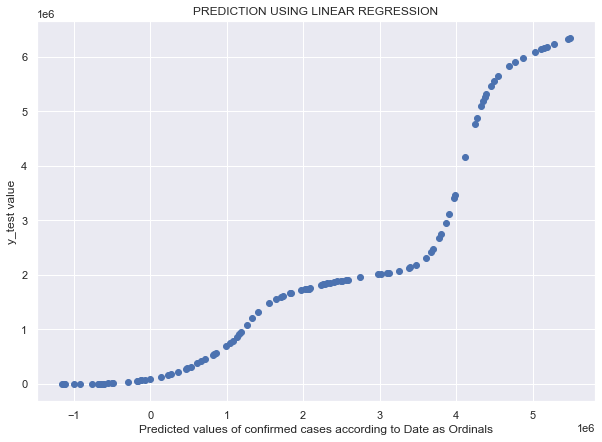

In [92]:
plt.scatter(y_pred_lr,y_test)
plt.xlabel('Predicted values of confirmed cases according to Date as Ordinals')
plt.ylabel('y_test value')
plt.title("PREDICTION USING LINEAR REGRESSION")
plt.show

# 3.DECISION TREE REGRESSOR

In [93]:
from sklearn.tree import DecisionTreeRegressor
Dt=DecisionTreeRegressor()
Dt.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

DecisionTreeRegressor()

In [94]:
y_pred_Dt=Dt.predict(np.array(x_test).reshape(-1,1))

In [95]:
y_pred_Dt

array([1.757520e+06, 1.868172e+06, 5.626155e+06, 2.179185e+06,
       5.245130e+05, 8.068000e+03, 6.245057e+06, 1.954553e+06,
       3.343951e+06, 2.064278e+06, 1.400000e+01, 6.817000e+03,
       1.902458e+06, 1.465911e+06, 7.486000e+04, 2.676650e+05,
       5.601260e+05, 5.344063e+06, 1.808550e+06, 5.221000e+03,
       5.266700e+04, 3.205000e+03, 2.637735e+06, 4.203000e+03,
       4.006510e+05, 2.449147e+06, 5.954600e+04, 1.060308e+06,
       1.654028e+06, 2.119870e+05, 5.226710e+06, 6.172645e+06,
       1.609516e+06, 7.001300e+04, 2.297793e+06, 2.904076e+06,
       2.396340e+06, 8.900000e+01, 5.963420e+06, 1.543837e+06,
       5.053336e+06, 1.698830e+05, 2.713875e+06, 1.049800e+04,
       1.714273e+06, 2.121119e+06, 5.138973e+06, 7.806890e+05,
       1.297400e+04, 4.722401e+06, 1.188015e+06, 1.820059e+06,
       3.070600e+04, 2.146777e+06, 8.852800e+04, 1.828826e+06,
       3.519208e+06, 4.412280e+05, 1.980000e+02, 4.822902e+06,
       1.731833e+06, 6.070599e+06, 4.203000e+03, 1.7404

In [96]:
from sklearn.metrics import r2_score      # R squared value of 0.91 and above here 0.9999 proves the model is good model.
print("The Accuracy using Decision tree Regessor is:")
r2_score(y_test,y_pred_Dt)

The Accuracy using Decision tree Regessor is:


0.9998946931727793

<function matplotlib.pyplot.show(close=None, block=None)>

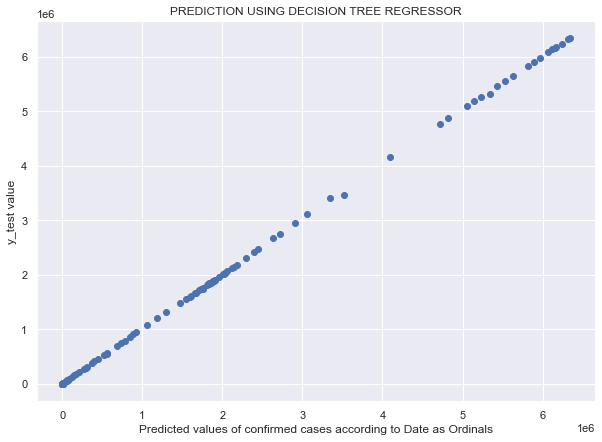

In [97]:
plt.scatter(y_pred_Dt,y_test)
plt.xlabel('Predicted values of confirmed cases according to Date as Ordinals')
plt.ylabel('y_test value')
plt.title("PREDICTION USING DECISION TREE REGRESSOR")
plt.show

In [98]:
#THIS WE HAVE PREDICTED JUST FOR MAHARASHTRA USING THREE DIFFERENT ALGORITHM AND USING SIMPLE JUST ONE INDEPEDENT VARIBLE.
#COZ WE WERE USING LINEAR REGRESSION AND NOT MUILTIPLE REGRESSION.

In [99]:
# OUTPUT FROM DIFFERENT MODELS FOR PREDICTION OF CONFIRMED CASES IN MAHARASHTRA IS:
# 1. DESISION TREE:                              ACCURACY IS : 0.9998816172319451............99.98%
# 2. LINEAR REGRESSION                           ACCURACY IS : 0.884645415132286 ...........88.46% 
# 3. RANDDOM FOREST REGRESSOR                    ACCURACY IS : 0.9999529958125605............. 99.99%

# PREDICTION FOR KERALA

In [100]:
kerala['date']=kerala['date'].map(dt.datetime.toordinal)

<ipython-input-100-741d4c792192>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kerala['date']=kerala['date'].map(dt.datetime.toordinal)


In [101]:
kerala.head()

,date,state,cured,deaths,confirmed
0,737454,Kerala,0,0,1
1,737455,Kerala,0,0,1
2,737456,Kerala,0,0,2
3,737457,Kerala,0,0,3
4,737458,Kerala,0,0,3


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
#Extracting Independent and Dependent Varibales.
x1=kerala['date']        #Independent varible
y1=kerala['confirmed']   #Dependent Varible
#Train and Test
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)

# 1.RANDOM FOREST REGRESSOR

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()  
rf.fit(np.array(x1_train).reshape(-1,1),np.array(y1_train).reshape(-1,1))
y1_pred_rf=rf.predict(np.array(x1_test).reshape(-1,1))
y1_pred_rf

<ipython-input-104-e40b3331eda5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(np.array(x1_train).reshape(-1,1),np.array(y1_train).reshape(-1,1))


array([8.76286820e+05, 2.11700000e+02, 2.60600000e+01, 1.83549061e+06,
       3.75800000e+02, 2.97978870e+06, 3.50728300e+04, 6.55856710e+05,
       3.67574410e+05, 6.33240030e+05, 1.10381582e+06, 3.63560000e+02,
       1.03924728e+06, 5.11288820e+05, 1.14374614e+06, 4.36191440e+05,
       2.33756222e+06, 3.26560000e+02, 8.86106400e+04, 4.84150540e+05,
       3.18000000e+00, 5.63848690e+05, 1.02719597e+06, 2.09440073e+06,
       7.70652480e+05, 1.04783464e+06, 1.07643935e+06, 8.22777810e+05,
       3.00000000e+00, 1.01436238e+06, 3.84392630e+05, 3.06166690e+06,
       4.67772640e+05, 7.60950000e+02, 1.27507800e+04, 6.24000000e+00,
       1.06694500e+04, 1.16314406e+06, 6.06027100e+04, 8.86938490e+05,
       2.35871209e+06, 9.81797650e+05, 1.09725151e+06, 3.93970000e+02,
       3.00000000e+00, 1.07091901e+06, 2.56664650e+05, 2.74361973e+06,
       7.23557740e+05, 8.53065200e+05, 6.97301980e+05, 2.87490000e+02,
       3.45690000e+02, 1.57000000e+00, 2.10542710e+05, 2.21954334e+06,
      

In [105]:
from sklearn.metrics import r2_score      # R squared value of 0.91 and above here 0.9999 proves the model is good model.
print("The Accuracy using Random Forest Regressor is:")
r2_score(y1_test,y1_pred_rf)

The Accuracy using Random Forest Regressor is:


0.9998374968102812

# 2. LINEAR REGRESSION

In [106]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(np.array(x1_train).reshape(-1,1),np.array(y1_train).reshape(-1,1))

LinearRegression()

In [107]:
y1_pred_lr=lr.predict(np.array(x1_test).reshape(-1,1))
y1_pred_lr

array([[1293341.77738523],
       [-400167.83108521],
       [-474045.76702547],
       [1895731.10120392],
       [-326289.89514542],
       [2225340.35385942],
       [ 355660.28276253],
       [1054659.21511793],
       [ 770513.30765629],
       [1026244.62437153],
       [1622951.03004074],
       [-337655.73144388],
       [1475195.15816069],
       [ 895537.50693941],
       [1719560.63857794],
       [ 827342.48914862],
       [1969609.03714418],
       [-354704.48589134],
       [ 514781.99094057],
       [ 867122.91619301],
       [-542240.78481627],
       [ 946683.77028227],
       [1458146.40371323],
       [1935511.52824879],
       [1185366.33255005],
       [1486560.99445915],
       [1543390.17595148],
       [1242195.51404238],
       [-638850.39335299],
       [1441097.64926529],
       [ 781879.14395475],
       [2259437.86275482],
       [ 855757.07989454],
       [ -98973.1691761 ],
       [ 236319.0016284 ],
       [-530874.9485178 ],
       [ 219270.24718094],
 

In [111]:
from sklearn.metrics import r2_score      # R squared value of 0.91 and above here 0.9999 proves the model is good model.
print("The Accuracy using Linear Regression is:")
r2_score(y1_test,y1_pred_lr)

The Accuracy using Linear Regression is:


0.7394450027973445

# 3. Decision Tree Regressor

In [112]:
from sklearn.tree import DecisionTreeRegressor
Dt=DecisionTreeRegressor()
Dt.fit(np.array(x1_train).reshape(-1,1),np.array(y1_train).reshape(-1,1))
y1_pred_Dt=Dt.predict(np.array(x1_test).reshape(-1,1))
y1_pred_Dt

array([8.705290e+05, 2.020000e+02, 2.600000e+01, 1.824856e+06,
       3.740000e+02, 2.973684e+06, 3.433100e+04, 6.540410e+05,
       3.778340e+05, 6.316150e+05, 1.102353e+06, 3.570000e+02,
       1.036869e+06, 5.082560e+05, 1.141092e+06, 4.331050e+05,
       2.347966e+06, 3.270000e+02, 8.784100e+04, 4.806690e+05,
       3.000000e+00, 5.664520e+05, 1.025937e+06, 2.085583e+06,
       7.712520e+05, 1.045009e+06, 1.075227e+06, 8.197650e+05,
       3.000000e+00, 1.011956e+06, 3.778340e+05, 3.053116e+06,
       4.664660e+05, 7.950000e+02, 1.248000e+04, 3.000000e+00,
       1.027500e+04, 1.160204e+06, 5.950400e+04, 8.842420e+05,
       2.347966e+06, 9.833740e+05, 1.096392e+06, 3.960000e+02,
       3.000000e+00, 1.069660e+06, 2.534050e+05, 2.735958e+06,
       7.215100e+05, 8.478480e+05, 6.938650e+05, 2.860000e+02,
       3.570000e+02, 1.000000e+00, 2.134990e+05, 2.169369e+06,
       2.915100e+04, 4.593000e+03, 6.950000e+03, 2.134990e+05,
       1.197301e+06, 7.844880e+05, 3.146981e+06, 3.1700

In [113]:
from sklearn.metrics import r2_score      # R squared value of 0.91 and above here 0.9999 proves the model is good model.
print("The Accuracy using Decision Tree is:")
r2_score(y1_test,y1_pred_Dt)

The Accuracy using Decision Tree is:


0.9996788670726661

In [114]:
#THIS WE HAVE PREDICTED JUST FOR KERALA USING THREE DIFFERENT ALGORITHM AND USING SIMPLE JUST ONE INDEPEDENT VARIBLE.
#COZ WE WERE USING  SIMPLE LINEAR REGRESSION AND NOT MUILTIPLE REGRESSION...

In [116]:
# OUTPUT FROM DIFFERENT MODELS FOR PREDICTION OF CONFIRMED CASES IN KERALA IS:
# 1. DESISION TREE:                              ACCURACY IS : 0.9996788670726661............99.96%
# 2. LINEAR REGRESSION                           ACCURACY IS : 0.7394450027973445............73.94%
# 3. RANDDOM FOREST REGRESSOR                    ACCURACY IS : 0.9998374968102812............99.98%

In [117]:
#WE CAN SEE THAT RANDOM FOREST REGRESSOR WORKS THE BEST FOR PREDICTION WITH THIS DATASET.

In [ ]:
#..........................................................................................................................#